<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям
*Идеальный просмотр Jupyter notebooks возможен только локально, GitHub и nbviewer могут неправильно отбражать формулы или картинки.*

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1KbWiGlupiSwYlqc8nmV6KjB3vNTI0C5hxZ6Tq3ZU4QA).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [2]:
import numpy as np
import pandas as pd

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [3]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')

Посмотрим на первые 5 записей.

In [124]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age-months,age_months,age_years,bmi
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,593.0,613.100000,50.0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,653.0,674.266667,55.0,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,608.0,628.566667,52.0,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,568.0,587.433333,48.0,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,564.0,582.466667,48.0,23.011177


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 16 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
age-months     70000 non-null float64
age_months     70000 non-null float64
age_years      70000 non-null float64
bmi            70000 non-null float64
dtypes: float64(5), int64(11)
memory usage: 11.6 MB


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше (здесь и далее под средним понимается среднее арифметическое).**

**<font color='red'>Варианты:</font>**
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин

In [8]:
# Ваш код здесь
df.pivot_table(['height'], ['gender'], 
               aggfunc='mean')

,height
gender,
1,161.355612
2,169.947895


In [10]:
df['gender'].value_counts()
#45530 женщин и 24470 мужчин
# 2 мужчины

1    45530
2    24470
Name: gender, dtype: int64

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем реже указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- мужчины 
- женщины

In [17]:
# Ваш код здесь
#df.alco.value_counts()
#df[df.alco==1]['gender'].value_counts()
pd.crosstab(df['gender'],df['alco'], normalize=True)
#женщины

alco,0,1
gender,,
1,0.633843,0.016586
2,0.312386,0.037186


**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно, `round`) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

In [34]:
# Ваш код здесь
round(df[df['gender']==2]['smoke'].value_counts(normalize=True)[1]/df[df['gender']==1]['smoke'].value_counts(normalize=True)[1])

#pd.crosstab(df['gender'],df['smoke'], normalize=True)
#12

12.0

**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чём здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 10
- 15
- 20
- 25

In [48]:
# Ваш код здесь
df['age_months'] =  df['age']/30

In [49]:
df.pivot_table(['age_months'], ['smoke'], 
               aggfunc='mean')

,age_months
smoke,
0,650.180024
1,636.361231


In [50]:
df.groupby(['smoke'])['age_months'].describe(percentiles=[])
#20

,count,mean,std,min,50%,max
smoke,,,,,,
0,63831.0,650.180024,82.053137,359.933333,657.4,790.433333
1,6169.0,636.361231,83.134076,476.400000,637.5,789.566667


**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='https://habrastorage.org/webt/gg/38/vf/gg38vfl5ql8obqjmlsvt9es76p8.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 64 лет включительно. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу, и она не включается).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., а уровень холестерина – 4 ммоль/л, то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180), а холестерина было бы 8 ммоль/л.

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Создайте новый признак ``age_years`` – возраст в годах, округлив до целых (`round`). Для данного примера отберите курящих мужчин от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.
- Интересуют 2 подвыборки курящих мужчин возраста от 60 до 64 лет включительно: первая с верхним артериальным давлением строго меньше 120 мм рт.ст. и концентрацией холестерина – 4 ммоль/л, а вторая – с верхним артериальным давлением от 160 (включительно) до 180 мм рт.ст. (не включительно) и концентрацией холестерина – 8 ммоль/л.

Во сколько раз (округленно, `round`) отличаются доли больных людей (согласно целевому признаку, `cardio`) в этих двух подвыборках? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- 2
- 3
- 4
- 5

In [67]:
# Ваш код здесь
df['age_years'] =  round(df['age']/365)
df['age_years'].describe()

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age_years, dtype: float64

In [135]:
grAll = df[(df['gender'] == 2) & (df['smoke'] == 1) & (df['age_years'] >= 60) & (df['age_years'] <= 64)]


gr2 = grAll[grAll['cholesterol'] == 3 & (grAll['ap_hi'] >= 160) & (grAll['ap_hi'] < 180)]
gr1 = grAll[grAll['cholesterol'] == 1 & (grAll['ap_hi'] < 120)]

gr1['cardio'].value_counts(normalize=True)[1]/gr2['cardio'].value_counts(normalize=True)[1]


#/ df[(df['gender'] == 2) & (df['smoke'] == 1) & (df['age_years'] >= 60) & (df['age_years'] <= 64) & (df['cholesterol'] == 1) & (df['ap_hi'] < 120)]['cardio'].value_counts(normalize=True)[1]

#.value_counts(normalize=True)
#0.2564102564102564
#0.891304
# 3 times

0.2876797998749218

**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке превышает норму
- У женщин в среднем BMI ниже, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

In [90]:
# Ваш код здесь
#((df['height']/100.0)**2).describe()
df['bmi']= df['weight']/(pow(df['height']/100.0,2))
df['bmi'].describe()
#1 - true

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

In [92]:
df.groupby(['gender'])['bmi'].describe(percentiles=[])
# 2 -false

,count,mean,std,min,50%,max
gender,,,,,,
1,45530.0,27.987583,6.495638,8.001829,26.709402,298.666667
2,24470.0,26.754442,5.162752,3.471784,25.910684,180.678074


In [94]:
df.groupby(['cardio'])['bmi'].describe(percentiles=[])
# 3 - false

,count,mean,std,min,50%,max
cardio,,,,,,
0,35021.0,26.548175,5.606469,7.022248,25.476660,237.768633
1,34979.0,28.566061,6.383666,3.471784,27.471384,298.666667


In [102]:
df[(df['alco']==0) & (df['cardio']==0)].groupby(['gender'])['bmi'].describe(percentiles=[])
#healthy men not alco 25.872638
#healthy women not alco 26.845407


,count,mean,std,min,50%,max
gender,,,,,,
1,22332.0,26.845407,5.843207,9.331007,25.654372,237.768633
2,10748.0,25.872638,4.918895,14.609204,25.102391,170.414201


In [103]:
df.groupby(['cardio','alco','gender'])['bmi'].describe(percentiles=[])

count       mean       std        min        50%  \
cardio alco gender                                                       
0      0    1       22332.0  26.845407  5.843207   9.331007  25.654372   
            2       10748.0  25.872638  4.918895  14.609204  25.102391   
       1    1         582.0  28.671457  7.045645  16.665936  27.885187   
            2        1359.0  26.097220  5.404698   7.022248  25.351541   
1      0    1       22037.0  29.052771  6.901441   8.001829  27.885187   
            2       11119.0  27.522450  5.247496   3.471784  26.674874   
       1    1         579.0  30.812347  6.045829  17.709563  30.110991   
            2        1244.0  28.226569  4.759114  17.301038  27.530797   

                           max  
cardio alco gender              
0      0    1       237.768633  
            2       170.414201  
       1    1       133.131378  
            2       133.660058  
1      0    1       298.666667  
            2       180.678074  
       1    1        55.459105  
            2        56.481481

**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления строго выше верхнего
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используйте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Это вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно, `round`) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- 10
- 11

In [169]:
# Ваш код здесь 70000
data1 = df[df['ap_lo'] <= df['ap_hi']]
data2 = data1[(data1['height'] >= df['height'].quantile(.025)) & (data1['height'] <= df['height'].quantile(.975))]
# data2 = df[(data1['height'] < 150) | (data1['height'] > 180)]

data3 = data2[(data2['weight'] >= df['weight'].quantile(.025))&(data2['weight'] <= df['weight'].quantile(.975))]
# data3 = data2[(data2['weight'] <51)|(data2['weight'] >108)]

data3.count()
#1234

age            63259
gender         63259
height         63259
weight         63259
ap_hi          63259
ap_lo          63259
cholesterol    63259
gluc           63259
smoke          63259
alco           63259
active         63259
cardio         63259
age-months     63259
age_months     63259
age_years      63259
bmi            63259
dtype: int64

In [165]:
df['weight'].quantile(.975)

108.0

In [171]:
a =(70000 - 63259)*100/70000
round(a)

10

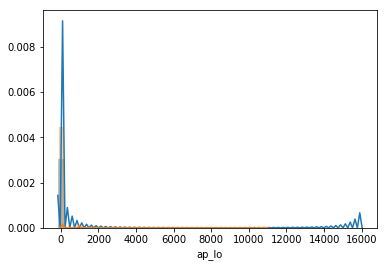

In [111]:
#!conda install seaborn
import seaborn as sns
sns.distplot(df['ap_hi'], label='hi')
sns.distplot(df['ap_lo'], label='lo')